In [46]:
import mujoco
from PIL import Image
from IPython.display import display

import cv2
import importlib

# robosuite
from robosuite.models.objects import BallObject, BoxObject
import robosuite as suite

import bricks_env

In [8]:
importlib.reload(bricks_env)

<module 'bricks_env' from '/home/user/Documents/projects/robosuite-notebooks/bricks_env.py'>

In [84]:
# create env
env = bricks_env.BricksEnv(robots="Panda", has_renderer=True)

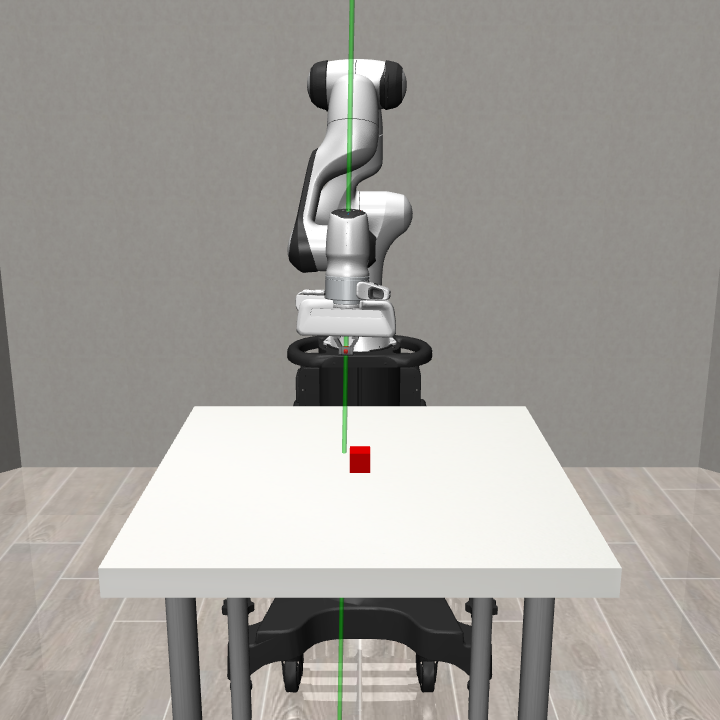

In [86]:
env_img = env.sim.render(720, 720, camera_name="frontview")
display(Image.fromarray(cv2.rotate(env_img, cv2.ROTATE_180)))

## Add objects to env

In [73]:
# add object to env

def reinit_env(env):
    # Load the model
    # self._load_model()
    
    # Initialize the simulation
    env._initialize_sim()

    # initializes the rendering
    env.initialize_renderer()

    # Run all further internal (re-)initialization required
    env._reset_internal()

    # Load observables
    if hasattr(env.viewer, "_setup_observables"):
        env._observables = env.viewer._setup_observables()
    else:
        env._observables = env._setup_observables()
        
    # check if viewer has get observations method and set a flag for future use.
    env.viewer_get_obs = hasattr(env.viewer, "_get_observations")

In [85]:
height=0.02
cube_2 = BoxObject(
    name="cubeA",
    size_min=[height, height, height],
    size_max=[height, height, height],
    rgba=[1, 0, 0, 1],
    # material=redwood,
)
cube_2_obj = cube_2.get_obj()
cube_2_obj.set('pos', f'0.0 0.0 {0.8 + height}')
env.model.worldbody.append(cube_2_obj)
reinit_env(env)

In [87]:
cube_2_obj

<Element 'body' at 0x7fb7bf614180>

In [83]:
f'{1}'

'1'

In [79]:
cube_2_obj.set('pos', f'0.0 0.0 0.85')

In [80]:
reinit_env(env)

In [77]:
cube_2.bottom_offset

array([ 0.  ,  0.  , -0.05])

In [78]:
cube_2.top_offset

array([0.  , 0.  , 0.05])

## Composite Object

## Stack Env

In [47]:
# create environment instance
env = suite.make(
    env_name="Stack", # try with other tasks like "Stack" and "Door"
    robots="Panda",  # try with other robots like "Sawyer" and "Jaco"
    has_renderer=True,
    has_offscreen_renderer=False,
    use_camera_obs=False,
)

In [55]:
object_placements = env.placement_initializer.sample()

In [56]:
object_placements

{'cubeA': ((0.06486862098379208, 0.02320509915021972, 0.8300000000000001),
  array([0.45229161, 0.        , 0.        , 0.89187011]),
  <robosuite.models.objects.primitive.box.BoxObject at 0x7fb869ad88b0>),
 'cubeB': ((-0.03440032241549508, -0.03004726670255293, 0.8350000000000001),
  array([0.19221385, 0.        , 0.        , 0.98135306]),
  <robosuite.models.objects.primitive.box.BoxObject at 0x7fb7bf71f7f0>)}

In [ ]:
from robosuite.models import MujocoWorldBase

world = MujocoWorldBase()

In [ ]:
from robosuite.models.robots import Panda

mujoco_robot = Panda()

In [ ]:
from robosuite.models.grippers import gripper_factory

gripper = gripper_factory('PandaGripper')
mujoco_robot.add_gripper(gripper)

In [ ]:
mujoco_robot.set_base_xpos([0, 0, 0])
world.merge(mujoco_robot)

In [ ]:
from robosuite.models.arenas import TableArena

mujoco_arena = TableArena()
mujoco_arena.set_origin([0.8, 0, 0])
world.merge(mujoco_arena)

In [ ]:
from robosuite.models.objects import BallObject
from robosuite.utils.mjcf_utils import new_joint

sphere = BallObject(
    name="sphere",
    size=[0.04],
    rgba=[0, 0.5, 0.5, 1]).get_obj()
sphere.set('pos', '1.0 0 1.0')
world.worldbody.append(sphere)

In [ ]:
world.worldbody

In [ ]:
model = world.get_model(mode="mujoco")


In [ ]:
model.geom(1)

In [ ]:
data = mujoco.MjData(model)

In [ ]:
renderer = mujoco.Renderer(model)

In [ ]:
mujoco.mj_forward(model, data)
renderer.update_scene(data)

In [ ]:
display(Image.fromarray(renderer.render()))

In [ ]:
import numpy as np
import robosuite as suite

In [ ]:
env_names = ["Lift", "Stack", "NutAssembly", "NutAssemblySingle", "NutAssemblySquare", "NutAssemblyRound", "PickPlace", "PickPlaceSingle", "PickPlaceMilk", "PickPlaceBread", "PickPlaceCereal", "PickPlaceCan", "Door", "Wipe", "TwoArmLift", "TwoArmPegInHole", "TwoArmHandover"]
env_names

In [ ]:
# create environment instance
env = suite.make(
    env_name="Stack", # try with other tasks like "Stack" and "Door"
    robots="Panda",  # try with other robots like "Sawyer" and "Jaco"
    has_renderer=True,
    has_offscreen_renderer=False,
    use_camera_obs=False,
)

In [ ]:
import importlib

In [ ]:
import bricks_env

In [ ]:
import robosuite

In [ ]:
from numba.np.ufunc import _internal

In [ ]:
import numba as nb

In [ ]:
importlib.reload(bricks_env)

In [ ]:
env = bricks_env.BricksEnv(robots="Panda", has_renderer=True)

In [ ]:
env_img = env.sim.render(224, 224, camera_name="frontview")
display(Image.fromarray(cv2.rotate(env_img, cv2.ROTATE_180)))

In [ ]:
env.render()

In [ ]:
# TODO where are cameras added?
camera_names = ['frontview', 'birdview', 'agentview', 'robot0_robotview', 'robot0_eye_in_hand']

In [ ]:
env.model.worldbody

In [ ]:
sphere = BallObject(
    name="sphere",
    size=[0.04],
    rgba=[0, 0.5, 0.5, 1],
    density=200
).get_obj()
sphere.set('pos', '0 0 0')

In [ ]:
env.model.worldbody.append(sphere)

In [ ]:
from robosuite.models.objects.composite.hammer import HammerObject

In [ ]:
hammer = HammerObject(name="hammer", use_texture=False).get_obj()
hammer.set('pos', '0.2 0.2 1.2')

In [ ]:
env.model.worldbody.append(hammer)

In [ ]:
reinit_env(env)

In [ ]:
env.has_offscreen_renderer

In [ ]:
env._initialize_sim()
env._reset_internal()
hasattr(self.viewer, "_setup_observables")

In [ ]:
hasattr(env.viewer, "_setup_observables")

In [ ]:
hasattr(env.viewer, "_get_observations")

In [ ]:
frames = []
for i in range(50):
    env.step(np.zeros(8))
    env_img = env.sim.render(720, 720, camera_name="agentview")
    frames.append(cv2.rotate(env_img, cv2.ROTATE_180))

In [ ]:
    env.step(np.zeros(8))

In [ ]:
import mediapy as media

In [ ]:
media.show_video(frames)

In [ ]:
env_img = env.sim.render(1280, 1280, camera_name="agentview")

In [ ]:
env_img = env.sim.render(1280, 1280, camera_name="agentview")
display(Image.fromarray(cv2.rotate(env_img, cv2.ROTATE_180)))

In [ ]:
from bricks_env import PickPlace

In [ ]:
env.step(action=np.zeros(8))